In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# read datasets
df_1 = pd.read_csv("gdp_improvement_rate.csv")
df_2 = pd.read_csv("unemployment.csv")

# merge datasets menjadi 1 dataset baru, merge berdasarkan fitur country
df = pd.merge(df_1, df_2, on='country')

# display dataset baru
df

,country,growth_rate,unemployment_percentage
0,Afghanistan,2.500,35.0
1,Albania,3.702,14.0
2,Algeria,1.457,11.7
3,Antigua and Barbuda,2.685,11.0
4,Argentina,2.464,8.1
...,...,...,...
154,Venezuela,-12.000,26.4
155,Vietnam,6.300,2.3
156,Yemen,-2.014,27.0
157,Zambia,3.978,15.0


In [ ]:
# Check jumlah data null
df.isnull().sum()

country                    0
growth_rate                0
unemployment_percentage    0
dtype: int64

In [ ]:
# Selecting features
df['country'] = LabelEncoder().fit_transform(df['country'])
x_data = df[['country', 'growth_rate']].values
y_data = df['unemployment_percentage'].values

In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
sc = StandardScaler().fit(x_train)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# Training SVM Classifier
regressor = SVR(kernel = 'linear').fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
# Metrics Evaluation
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)

print(f'MSE : {MSE:.2f}')
print(f'MAE : {MAE:.2f}')
print(f'RMSE : {RMSE:.2f}')

MSE : 77.59
MAE : 5.80
RMSE : 8.81


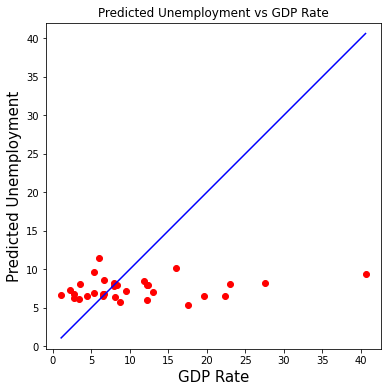

In [ ]:
# Visualizing Plot Predicted Value vs Measure
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='red')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Predicted Unemployment vs GDP Rate')
plt.xlabel('GDP Rate', fontsize=15)
plt.ylabel('Predicted Unemployment', fontsize=15)
plt.axis('equal')
plt.show()